In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/home/jpierre/v2/lib')

import utils2.testing_gen as gen
import utils2.loading as load
import utils2.nn_gen as nn_gen
from utils2.tools import array2List

from NNSimulator import genSim, getSimulationData


from norm import normalizeGraph

from measure import Param_eval, EvaluationCfg, evaluateLoad, saveLoader


yessss sir
>>>>>>>>>>>> LOADOING THE V2 OF FEATURES
fndjngkjdfs --NN-sim
update


In [2]:
def errorsDiv(pred, gt):
    
    v = np.pi * 2
    anglePred = np.arctan2(pred[:, 1], pred[:, 0])
    angleGT = np.arctan2(gt[:, 1], gt[:, 0])

    normPred = np.linalg.norm(pred, axis=-1)
    normGT = np.linalg.norm(gt, axis=-1)

    errorNorm = np.abs(normPred - normGT)
    errorAngle = errorAngle = np.abs((anglePred - angleGT + np.pi) % (2 * np.pi) - np.pi)

    return errorAngle, errorNorm

In [3]:
import stats.stats_re as stats
import yaml

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

PATH = ['/home/jpierre/v2/results_end/files/gnn-1', '/home/jpierre/v2/results_end/files/gnn-2']
MODEL_PATH = '/home/jpierre/v2/results_end/models'
MODEL = 'compex'

In [5]:
def loadModel(modelName:str, d, path = MODEL_PATH):
    """ 
    Function to import the model

    Args:
    -----
        - `modelName`: name of the model
        - `inputShape`: inout shape of the NN
        - `edges_shape`: edge shape of the NN
        - `path`: path where the models are
    """

    sys.path.append(path)

    loadFun = __import__(f'{modelName}', fromlist = ('loadNetwork'))

    #model = loadFun.loadNetwork(inputShape, edges_shape)
    model = loadFun.loadNetwork(d)

    return model


In [6]:
def getModel(cfg, std_path, device = DEVICE, model_path = MODEL_PATH):

    with open(cfg, 'r') as file:
        cfg = yaml.safe_load(file) 

    trainingInfos = cfg['training']

    d_model = trainingInfos['cfg_mod'][f'{trainingInfos["cfg_mod"]["model_name"]}']


    model = loadModel(MODEL, d_model, model_path)



    state_dict = torch.load(std_path, map_location = 'cpu')

    model.load_state_dict(state_dict)

    model.eval()

    model = model.to(device)

    return model

    

In [7]:
class id():
    def __init__(self):
        self.nbLayer = None
        self.dropout = None
        self.layerNorm = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.cfg = None


    def load_id(self, path:str):
        try:
            nb_layer_match = re.search(r'nbLyaer-(\d+)', path)
            dropout_match = re.search(r'dropout-(\d+)', path)
            layer_norm_match = re.search(r'layerNorm-(\d+)', path)

            self.nbLayer = int(nb_layer_match.group(1))
            self.dropout = int(dropout_match.group(1))
            self.layerNorm = int(layer_norm_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
            self.cfg = os.path.join(os.path.dirname(os.path.dirname(path)), 'cfg.yml')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_nbLayer-{self.nbLayer}_dropout{self.dropout}_layerNorm{self.layerNorm}'
    

def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res




res = []

for path in PATH:
    res.extend(get_path_models(path))

In [8]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/compex_best.pt >>> {'nbLayer': 1, 'dropout': 0, 'layerNorm': 0, 'path': '/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/compex_best.pt', 'loss': '/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/loss_list.npy', 'eval_loss': '/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_list.npy', 'eval_sim_loss': '/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'cfg': '/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/cfg.yml'}
/home/jpierre/v2/results_end/files/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-1/model_trained/compex_best.pt >>> {'nbLayer

# =====================

In [9]:
normal_runs = []
noisy_runs = []


for r in res:
    if r.data_type == 'normal':
        normal_runs.append(r)
    elif r.data_type == 'noisy':
        noisy_runs.append(r)
        
        
        
normal_models_layers = []
normal_layers_val = []

noisy_models_layers = []
noisy_layers_val = []


for r in normal_runs:
    if r.data_type == 'normal':
        if r.dropout == 0:
            nbLayer = r.nbLayer
            normal_layers_val.append(nbLayer)


            normal_models_layers.append(r)



for r in noisy_runs:
    if r.data_type == 'noisy':
        if r.dropout == 0:
            nbLayer = r.nbLayer
            noisy_layers_val.append(nbLayer)


            noisy_models_layers.append(r)


# ===================### 

In [10]:
NB_SIM = 5


def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 400


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params


params1 = getParams()

params2 = getParams()
params2.noisy = 1


data_gt_1  = gen.get_mult_data(params1, NB_SIM)
graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1 = array2List(data_gt_1)


#data_gt_2 = gen.get_mult_data(params2, NB_SIM)
#graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
#data_gt_list_2 = array2List(data_gt_2)

0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:16<00:00, 24.58it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:16<00:00, 24.00it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:16<00:00, 24.31it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:15<00:00, 25.28it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:15<00:00, 24.95it/s]


In [11]:
start = 250
length = 100


stop = start+length

In [12]:

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)



MSD_base_normal = stats.MSD_stat(data_gt_1[:, start:stop])
RDF_base_normal  = stats.apply_rdf(data_gt_1[:, start:stop])
SCAT_base_normal = stats.applySelfScattering(data_gt_1[:, start:stop])
DISTR_base_normal = stats.apply_hist(data_gt_1, a, b)
SUM_base_normal = stats.sumSpeeds(data_gt_1[:, start:stop])        # issue wiht libtrayr

100%|██████████| 100/100 [00:02<00:00, 35.09it/s]


In [13]:
# laoders
import dataLoading as dl
from torch_geometric.loader import DataLoader
from torch.utils.data import DataLoader as DataLoaderPy




PATH_BASE = '/home/jpierre/v2/path_datasets'

def getLoader(path, batch_size = 32, shuffleBool = True, root = None, jsonFile = None, mode = 'training'):
    datasetTraining = dl.DataLoader2(root, path = path, jsonFile = jsonFile, mode = mode)
    loader = DataLoader(datasetTraining, batch_size=batch_size, shuffle = shuffleBool)
    
    return loader

# 1s-tep loader
p_data = '/scratch/users/jpierre/mew_0.001_normal_v2'
#p_data = '/scratch/users/jpierre/mew_0.001_noisy_v2'

batchSizeEval = 128
p_json = os.path.join(PATH_BASE, f'{p_data.split("/")[-1]}.json')

loaderEval = getLoader(p_data, batch_size = batchSizeEval, jsonFile = p_json, mode = 'validation')


# rollout laoder

p_sim = os.path.join(p_data, 'validation/np_file')

loaderSim = dl.simLoader2(p_sim)
loaderSim = DataLoaderPy(loaderSim, batch_size=1, shuffle=False)

1it [00:02,  2.38s/it]


# ===================### 

In [14]:
MSD_list_normal = []
RDF_list_normal = []
SCAT_list_normal = []
DISTR_list_normal = []
SUM_list_normal = []
MSE_rollout = []

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)



device = DEVICE


errors_list = []
std_errors_list = []
angles_error_list = []
norm_errors_list = []
angle_errors_std_list = []
norm_errors_std_list = []



sim_error_list = []
sim_error_std_list = []




for i in tqdm(range(len(normal_models_layers))):

    ## load model
    cfg = normal_models_layers[i].cfg
    std_path = normal_models_layers[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_1, 
                                        initId = start,
                                        nbStep = length,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy()[:, :length],data_gt_1.copy()[:, start:stop])



    MSD_list_normal.append(msd)
    RDF_list_normal.append(rdf)
    SCAT_list_normal.append(scat)
    DISTR_list_normal.append(speed_distr)
    SUM_list_normal.append(sum_speed)
    
    
    
    
    errors = []
    normError = []
    angleError = []
    
    for d, _ in tqdm(loaderEval, leave = False):
        d = d.to(device)
        d.x = d.x[:, 2:]
        d = normalizeGraph(d)
        pred = model(d)  
        
        d.y = torch.swapaxes(d.y, 0, 1)
        

        #evalLoss += torch.nn.functional.l1_loss(pred.reshape(-1), d.y[0, :, :].reshape(-1))
        
        
        errors.extend(torch.abs(pred - d.y[0, :, :]).cpu().detach().numpy().tolist())
        
        
        errorAngle, errorNorm = errorsDiv(pred.cpu().detach().numpy(), d.y[0, :, :].cpu().detach().numpy())
        
        normError.extend(errorNorm.tolist())
        angleError.extend(errorAngle.tolist())


    erros1 = np.mean(errors)
    errors_std = np.std(errors)

    angle_error = np.median(errorAngle)
    norm_error = np.median(normError)

    angle_std = np.std(errorAngle)
    norm_std  = np.std(normError)


    # add to the other lists
    errors_list.append(erros1)
    std_errors_list.append(errors_std)
    angles_error_list.append(angle_std)
    norm_errors_list.append(norm_error)
    angle_errors_std_list.append(angle_std)
    norm_errors_std_list.append(norm_std)
    
    
    
    
    ################
    
    
    eval_loss_list = []

    for d, _ in loaderSim:

        d = torch.squeeze(d, dim = 0).numpy()
        start_id = 8       # not 0
        res = getSimulationData(model, 15, d, i = start_id, device = DEVICE)
        L = res.shape[0]

        eval_loss_list.append(torch.nn.functional.l1_loss(res.reshape(-1), torch.from_numpy(d[start_id:(start_id + L), :, :].copy()).reshape(-1).to(device)).cpu().detach().numpy())

    
    
    sim_error_list.append(np.mean(eval_loss_list))
    sim_error_std_list.append(np.std(eval_loss_list))


  0%|          | 0/8 [00:00<?, ?it/s]

loading compex model
>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:01<00:00, 69.73it/s]

100%|██████████| 99/99 [00:01<00:00, 98.45it/s] 

100%|██████████| 99/99 [00:01<00:00, 94.07it/s]

100%|██████████| 99/99 [00:01<00:00, 80.91it/s]

100%|██████████| 99/99 [00:00<00:00, 113.87it/s]

100%|██████████| 100/100 [00:02<00:00, 36.91it/s][A

100%|██████████| 100/100 [00:01<00:00, 51.45it/s][A

100%|██████████| 100/100 [00:02<00:00, 41.28it/s][A

100%|██████████| 100/100 [00:01<00:00, 52.60it/s]

100%|██████████| 100/100 [00:01<00:00, 50.96it/s]

 13%|█▎        | 20/155 [01:01<02:26,  1.08s/it]


100%|██████████| 155/155 [02:50<00:00,  2.17s/it]
                                                 
100%|██████████| 15/15 [00:00<00:00, 106.15it/s][A

100%|██████████| 15/15 [00:00<00:00, 98.15it/s] 

100%|██████████| 15/15 [00:00<00:00, 150.46it/s]

100%|██████████| 15/15 [00:00<00:00, 100.95it/s]

100%|██████████| 15/15 [00:00<00:00, 99.63it/s] 

100%|██████████| 15/15 [00:00<00:00, 96.39it/s]

100%|██████████| 15/15 [00:00<00:00, 113.10it/s]

100%|██████████| 15/15 [00:00<00:00, 106.39it/s]A

100%|██████████| 15/15 [00:00<00:00, 155.60it/s]

100%|██████████| 15/15 [00:00<00:00, 131.93it/s]

100%|██████████| 15/15 [00:00<00:00, 109.05it/s]

100%|██████████| 15/15 [00:00<00:00, 119.62it/s]



100%|██████████| 15/15 [00:00<00:00, 164.02it/s]

100%|██████████| 15/15 [00:00<00:00, 123.03it/s]

100%|██████████| 15/15 [00:00<00:00, 94.87it/s] 

100%|██████████| 15/15 [00:00<00:00, 92.61it/s]

100%|██████████| 15/15 [00:00<00:00, 136.98it/s]

100%|██████████| 15/15 [00:00<00:00, 121.77it/s]

100%|██████████| 15/15 [00:00<00:00, 108.21it/s]

 12%|█▎        | 1/8 [03:53<27:14, 233.47s/it]

>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 149.99it/s]

100%|██████████| 99/99 [00:00<00:00, 143.89it/s]

100%|██████████| 99/99 [00:00<00:00, 218.36it/s]

100%|██████████| 99/99 [00:00<00:00, 211.63it/s]

100%|██████████| 99/99 [00:00<00:00, 226.37it/s]

100%|██████████| 100/100 [00:01<00:00, 76.18it/s][A

100%|██████████| 100/100 [00:01<00:00, 68.25it/s][A

100%|██████████| 100/100 [00:01<00:00, 74.25it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.53it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.91it/s][A

 41%|████      | 63/155 [00:48<01:28,  1.04it/s]


100%|██████████| 155/155 [02:00<00:00,  1.48it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 190.49it/s]

100%|██████████| 15/15 [00:00<00:00, 102.47it/s]

100%|██████████| 15/15 [00:00<00:00, 231.47it/s]

100%|██████████| 15/15 [00:00<00:00, 126.13it/s]

100%|██████████| 15/15 [00:00<00:00, 96.31it/s]

100%|██████████| 15/15 [00:00<00:00, 117.50it/s]

100%|██████████| 15/15 [00:00<00:00, 159.78it/s]

100%|██████████| 15/15 [00:00<00:00, 167.26it/s]

100%|██████████| 15/15 [00:00<00:00, 123.25it/s]

100%|██████████| 15/15 [00:00<00:00, 113.42it/s]

100%|██████████| 15/15 [00:00<00:00, 175.77it/s]

100%|██████████| 15/15 [00:00<00:00, 238.77it/s]

100%|██████████| 15/15 [00:00<00:00, 240.90it/s]

100%|██████████| 15/15 [00:00<00:00, 239.19it/s]

100%|██████████| 15/15 [00:00<00:00, 95.91it/s]

100%|██████████| 15/15 [00:00<00:00, 125.18it/s]

100%|██████████| 15/15 [00:00<00:00, 153.30it/s]

100%|██████████| 15/15 [00:00<00:00, 159.67it/s]

10

>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:01<00:00, 95.82it/s]

100%|██████████| 99/99 [00:01<00:00, 89.20it/s]

100%|██████████| 99/99 [00:00<00:00, 165.71it/s]

100%|██████████| 99/99 [00:01<00:00, 90.62it/s]

100%|██████████| 99/99 [00:01<00:00, 86.66it/s]

100%|██████████| 100/100 [00:02<00:00, 39.29it/s][A

100%|██████████| 100/100 [00:02<00:00, 37.39it/s][A

100%|██████████| 100/100 [00:01<00:00, 54.17it/s][A

100%|██████████| 100/100 [00:02<00:00, 42.84it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.44it/s][A

 17%|█▋        | 26/155 [00:22<01:31,  1.41it/s]


100%|██████████| 155/155 [02:08<00:00,  1.22it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 168.38it/s]

100%|██████████| 15/15 [00:00<00:00, 169.53it/s]

100%|██████████| 15/15 [00:00<00:00, 169.27it/s]

100%|██████████| 15/15 [00:00<00:00, 171.11it/s]

100%|██████████| 15/15 [00:00<00:00, 169.38it/s]

100%|██████████| 15/15 [00:00<00:00, 170.81it/s]

100%|██████████| 15/15 [00:00<00:00, 167.19it/s]

100%|██████████| 15/15 [00:00<00:00, 166.19it/s]

100%|██████████| 15/15 [00:00<00:00, 170.67it/s]

100%|██████████| 15/15 [00:00<00:00, 169.47it/s]

100%|██████████| 15/15 [00:00<00:00, 169.91it/s]

100%|██████████| 15/15 [00:00<00:00, 160.46it/s]

100%|██████████| 15/15 [00:00<00:00, 169.05it/s]

100%|██████████| 15/15 [00:00<00:00, 168.66it/s]

100%|██████████| 15/15 [00:00<00:00, 184.15it/s]

100%|██████████| 15/15 [00:00<00:00, 182.55it/s]

100%|██████████| 15/15 [00:00<00:00, 162.05it/s]

100%|██████████| 15/15 [00:00<00:00, 167.97it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 175.52it/s]

100%|██████████| 99/99 [00:00<00:00, 171.49it/s]

100%|██████████| 99/99 [00:00<00:00, 179.67it/s]

100%|██████████| 99/99 [00:00<00:00, 161.44it/s]

100%|██████████| 99/99 [00:00<00:00, 140.32it/s]

100%|██████████| 100/100 [00:01<00:00, 73.04it/s][A

100%|██████████| 100/100 [00:01<00:00, 69.12it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.29it/s][A

100%|██████████| 100/100 [00:01<00:00, 77.53it/s][A

100%|██████████| 100/100 [00:01<00:00, 76.34it/s][A

 40%|████      | 62/155 [00:56<01:05,  1.41it/s]


100%|██████████| 155/155 [02:32<00:00,  5.95s/it]
                                                 
100%|██████████| 15/15 [00:00<00:00, 166.37it/s]

100%|██████████| 15/15 [00:00<00:00, 168.97it/s]

100%|██████████| 15/15 [00:00<00:00, 169.00it/s]

100%|██████████| 15/15 [00:00<00:00, 170.16it/s]

100%|██████████| 15/15 [00:00<00:00, 186.96it/s]

100%|██████████| 15/15 [00:00<00:00, 179.13it/s]

100%|██████████| 15/15 [00:00<00:00, 203.98it/s]

100%|██████████| 15/15 [00:00<00:00, 185.41it/s]

100%|██████████| 15/15 [00:00<00:00, 178.82it/s]

100%|██████████| 15/15 [00:00<00:00, 180.44it/s]

100%|██████████| 15/15 [00:00<00:00, 179.04it/s]

100%|██████████| 15/15 [00:00<00:00, 175.77it/s]

100%|██████████| 15/15 [00:00<00:00, 180.68it/s]

100%|██████████| 15/15 [00:00<00:00, 183.09it/s]

100%|██████████| 15/15 [00:00<00:00, 154.43it/s]

100%|██████████| 15/15 [00:00<00:00, 182.42it/s]

100%|██████████| 15/15 [00:00<00:00, 172.29it/s]

100%|██████████| 15/15 [00:00<00:00, 181.69it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 132.51it/s]

100%|██████████| 99/99 [00:00<00:00, 125.79it/s]

100%|██████████| 99/99 [00:00<00:00, 136.36it/s]

100%|██████████| 99/99 [00:00<00:00, 140.88it/s]

100%|██████████| 99/99 [00:00<00:00, 123.74it/s]

100%|██████████| 100/100 [00:01<00:00, 79.87it/s][A

100%|██████████| 100/100 [00:01<00:00, 64.91it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.71it/s][A

100%|██████████| 100/100 [00:01<00:00, 70.36it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.40it/s][A

 37%|███▋      | 57/155 [00:50<01:36,  1.01it/s]


100%|██████████| 155/155 [03:36<00:00,  1.16it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 153.96it/s]

100%|██████████| 15/15 [00:00<00:00, 152.41it/s]

100%|██████████| 15/15 [00:00<00:00, 136.82it/s]

100%|██████████| 15/15 [00:00<00:00, 156.06it/s]

100%|██████████| 15/15 [00:00<00:00, 134.29it/s]

100%|██████████| 15/15 [00:00<00:00, 137.31it/s]

100%|██████████| 15/15 [00:00<00:00, 135.74it/s]

100%|██████████| 15/15 [00:00<00:00, 129.83it/s]

100%|██████████| 15/15 [00:00<00:00, 128.32it/s]

100%|██████████| 15/15 [00:00<00:00, 120.48it/s]

100%|██████████| 15/15 [00:00<00:00, 110.78it/s]

100%|██████████| 15/15 [00:00<00:00, 152.33it/s]

100%|██████████| 15/15 [00:00<00:00, 138.33it/s]

100%|██████████| 15/15 [00:00<00:00, 153.18it/s]

100%|██████████| 15/15 [00:00<00:00, 142.37it/s]

100%|██████████| 15/15 [00:00<00:00, 118.42it/s]

100%|██████████| 15/15 [00:00<00:00, 134.21it/s]

100%|██████████| 15/15 [00:00<00:00, 141.71it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 121.56it/s]

100%|██████████| 99/99 [00:00<00:00, 129.69it/s]

100%|██████████| 99/99 [00:00<00:00, 121.61it/s]

100%|██████████| 99/99 [00:00<00:00, 129.65it/s]

100%|██████████| 99/99 [00:00<00:00, 135.91it/s]

100%|██████████| 100/100 [00:01<00:00, 74.28it/s]

100%|██████████| 100/100 [00:01<00:00, 70.26it/s]

100%|██████████| 100/100 [00:01<00:00, 81.65it/s][A

100%|██████████| 100/100 [00:01<00:00, 77.48it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.12it/s][A

 36%|███▌      | 56/155 [00:42<01:10,  1.41it/s]


100%|██████████| 155/155 [03:36<00:00,  1.15it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 156.58it/s]

100%|██████████| 15/15 [00:00<00:00, 157.11it/s]

100%|██████████| 15/15 [00:00<00:00, 156.36it/s]

100%|██████████| 15/15 [00:00<00:00, 156.79it/s]

100%|██████████| 15/15 [00:00<00:00, 156.85it/s]

100%|██████████| 15/15 [00:00<00:00, 157.51it/s]

100%|██████████| 15/15 [00:00<00:00, 151.43it/s]

100%|██████████| 15/15 [00:00<00:00, 136.02it/s]

100%|██████████| 15/15 [00:00<00:00, 157.79it/s]

100%|██████████| 15/15 [00:00<00:00, 157.37it/s]

100%|██████████| 15/15 [00:00<00:00, 156.88it/s]

100%|██████████| 15/15 [00:00<00:00, 93.47it/s][A

100%|██████████| 15/15 [00:00<00:00, 142.34it/s]

100%|██████████| 15/15 [00:00<00:00, 134.00it/s]

100%|██████████| 15/15 [00:00<00:00, 133.15it/s]

100%|██████████| 15/15 [00:00<00:00, 133.48it/s]

100%|██████████| 15/15 [00:00<00:00, 137.47it/s]

100%|██████████| 15/15 [00:00<00:00, 138.56it/s]


>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 117.90it/s]

100%|██████████| 99/99 [00:00<00:00, 111.41it/s]

100%|██████████| 99/99 [00:00<00:00, 109.82it/s]

100%|██████████| 99/99 [00:00<00:00, 125.23it/s]

100%|██████████| 99/99 [00:00<00:00, 117.98it/s]

100%|██████████| 100/100 [00:01<00:00, 70.90it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.20it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.94it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.18it/s][A

100%|██████████| 100/100 [00:01<00:00, 74.48it/s][A

 31%|███       | 48/155 [00:40<01:25,  1.25it/s]


100%|██████████| 155/155 [02:44<00:00,  1.14it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 107.68it/s]

100%|██████████| 15/15 [00:00<00:00, 106.13it/s]

100%|██████████| 15/15 [00:00<00:00, 115.13it/s]

100%|██████████| 15/15 [00:00<00:00, 113.61it/s]

100%|██████████| 15/15 [00:00<00:00, 100.65it/s]

100%|██████████| 15/15 [00:00<00:00, 106.21it/s]

100%|██████████| 15/15 [00:00<00:00, 116.14it/s]

100%|██████████| 15/15 [00:00<00:00, 116.05it/s]

100%|██████████| 15/15 [00:00<00:00, 115.88it/s]

100%|██████████| 15/15 [00:00<00:00, 118.99it/s]

100%|██████████| 15/15 [00:00<00:00, 128.58it/s]

100%|██████████| 15/15 [00:00<00:00, 123.07it/s]

100%|██████████| 15/15 [00:00<00:00, 123.62it/s]

100%|██████████| 15/15 [00:00<00:00, 123.92it/s]

100%|██████████| 15/15 [00:00<00:00, 124.23it/s]

100%|██████████| 15/15 [00:00<00:00, 115.43it/s]

100%|██████████| 15/15 [00:00<00:00, 114.48it/s]

100%|██████████| 15/15 [00:00<00:00, 126.78it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 116.20it/s]

100%|██████████| 99/99 [00:00<00:00, 124.42it/s]

100%|██████████| 99/99 [00:00<00:00, 115.84it/s]

100%|██████████| 99/99 [00:00<00:00, 125.15it/s]

100%|██████████| 99/99 [00:00<00:00, 119.98it/s]

100%|██████████| 100/100 [00:01<00:00, 74.19it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.23it/s]

100%|██████████| 100/100 [00:01<00:00, 71.66it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.80it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.24it/s][A

 33%|███▎      | 51/155 [00:39<01:18,  1.33it/s]


100%|██████████| 155/155 [03:06<00:00,  3.57s/it]
                                                 
100%|██████████| 15/15 [00:00<00:00, 110.30it/s]

100%|██████████| 15/15 [00:00<00:00, 118.58it/s]

100%|██████████| 15/15 [00:00<00:00, 114.13it/s]

100%|██████████| 15/15 [00:00<00:00, 118.44it/s]

100%|██████████| 15/15 [00:00<00:00, 117.71it/s]

100%|██████████| 15/15 [00:00<00:00, 117.22it/s]

100%|██████████| 15/15 [00:00<00:00, 118.24it/s]

100%|██████████| 15/15 [00:00<00:00, 118.25it/s]

100%|██████████| 15/15 [00:00<00:00, 104.54it/s]

100%|██████████| 15/15 [00:00<00:00, 119.56it/s]

100%|██████████| 15/15 [00:00<00:00, 118.45it/s]

100%|██████████| 15/15 [00:00<00:00, 116.42it/s]

100%|██████████| 15/15 [00:00<00:00, 118.50it/s]

100%|██████████| 15/15 [00:00<00:00, 116.76it/s]

100%|██████████| 15/15 [00:00<00:00, 126.12it/s]

100%|██████████| 15/15 [00:00<00:00, 125.10it/s]

100%|██████████| 15/15 [00:00<00:00, 132.17it/s]

100%|██████████| 15/15 [00:00<00:00, 116.35it/s]



In [15]:
print(f'errors ==>  {errors_list}')
print(f'errors std ==> {std_errors_list}')
print(f'angle_error ==>  {angles_error_list}')
print(f'angle_std std ==> {angle_errors_std_list}')
print(f'norm_errors_list ==>  {norm_errors_list}')
print(f'norm_errors_std_list std ==> {norm_errors_std_list}')

print(f'sim_error_list ==>  {sim_error_list}')
print(f'sim_error_std_list std ==> {sim_error_std_list}')

errors ==>  [0.0001894542893799895, 0.00019603361832621103, 0.0001794614033198141, 0.00018388631487274156, 0.0001791276599397768, 0.0001735420379299059, 0.0001966553239343631, 0.00017665311015780403]
errors std ==> [0.001077981984020416, 0.0010767357944616897, 0.0010675555971248359, 0.001076352341319492, 0.0010911613263028211, 0.0010852864455836468, 0.001123499259466426, 0.0010989512413842255]
angle_error ==>  [0.020397943, 0.030147728, 0.018794743, 0.040118076, 0.041769534, 0.024694119, 0.015678655, 0.04372416]
angle_std std ==> [0.020397943, 0.030147728, 0.018794743, 0.040118076, 0.041769534, 0.024694119, 0.015678655, 0.04372416]
norm_errors_list ==>  [7.852166891098022e-05, 7.047504186630249e-05, 5.62518835067749e-05, 5.71422278881073e-05, 3.7964433431625366e-05, 4.345551133155823e-05, 4.906207323074341e-05, 3.849156200885773e-05]
norm_errors_std_list std ==> [0.0009815688330940139, 0.0009794215176185143, 0.0009600063646118172, 0.0009774143145991588, 0.001002708761763195, 0.00099355

In [16]:
nb_layer_list = [normal_models_layers[i].nbLayer for i in range(len(normal_models_layers))]
# layer norm
print(nb_layer_list)

[1, 1, 2, 2, 3, 3, 4, 4]


In [17]:
labels_graphs = [f'nb layer {normal_models_layers[i].nbLayer} - layer norm {normal_models_layers[i].layerNorm}' for i in range(len(normal_models_layers))]
print(labels_graphs)

['nb layer 1 - layer norm 0', 'nb layer 1 - layer norm 1', 'nb layer 2 - layer norm 0', 'nb layer 2 - layer norm 1', 'nb layer 3 - layer norm 0', 'nb layer 3 - layer norm 1', 'nb layer 4 - layer norm 0', 'nb layer 4 - layer norm 1']


In [18]:
colors = ['blue','blue', 'green', 'green', 'orange','orange', 'red', 'red']
styles = ['solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted']

In [19]:
limit_scat = 99
limit_msd = 99


(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)


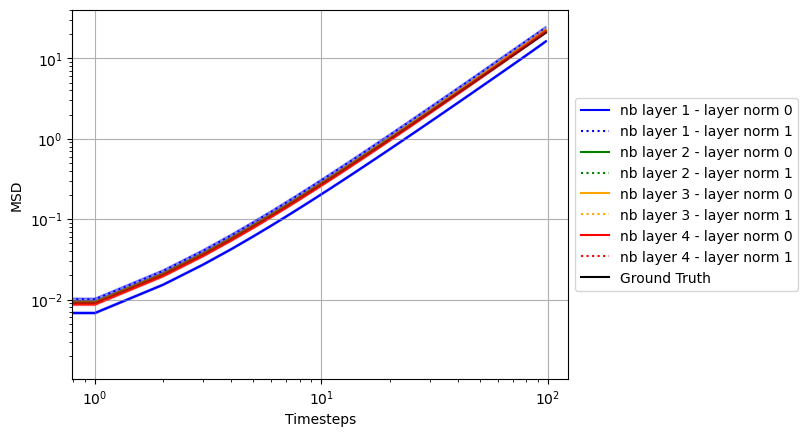

In [20]:
# plot of MSD

res_msd = []


for i in range(len(nb_layer_list)):
    print(MSD_list_normal[i][:limit_msd].shape)
    msd_mean = np.mean(MSD_list_normal[i][:, :limit_msd], axis = 0)
    msd_std = np.std(MSD_list_normal[i][:, :limit_msd], axis = 0)
    x = np.arange(limit_msd)
    plt.loglog(x, msd_mean, color = colors[i], linestyle=styles[i], zorder = 1, label = labels_graphs[i])
    plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = colors[i], alpha = 0.4, zorder = 2)
    
    res_msd.append(msd_mean)
    
msd_mean = np.mean(MSD_base_normal[:, :limit_msd], axis = 0)
msd_std = np.std(MSD_base_normal[:, :limit_msd], axis = 0)
x = np.arange(limit_msd)
plt.loglog(x, msd_mean, color = 'k', zorder = 1, label = 'Ground Truth')
plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = 'k', alpha = 0.2, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('MSD-gnn-normal.png', bbox_inches='tight')
plt.show()


In [21]:
msd_gt = np.mean(MSD_base_normal[:, :limit_msd], axis = 0)

for i in range(len(res_msd)):
    delta = (msd_gt - res_msd[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 4.866817049377649 +- 6.0783380699482
l1: nb layer 1 - layer norm 1 >>>> 1.9674250271484406 +- 2.743165843506659
l1: nb layer 2 - layer norm 0 >>>> 0.2654590460836581 +- 0.4340837482672121
l1: nb layer 2 - layer norm 1 >>>> 0.37428666221206347 +- 0.5861262978857786
l1: nb layer 3 - layer norm 0 >>>> 0.41479303858157884 +- 0.6693854986542707
l1: nb layer 3 - layer norm 1 >>>> 0.2547027230753652 +- 0.427137630548026
l1: nb layer 4 - layer norm 0 >>>> 0.01687846920413917 +- 0.03627076576587913
l1: nb layer 4 - layer norm 1 >>>> 0.18716612236205413 +- 0.34321037983637354


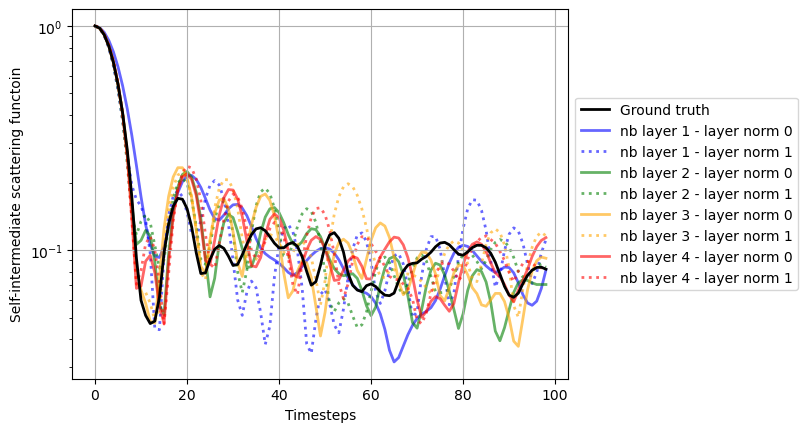

In [22]:
# plot of scat

res_scat = []

ssf_mean = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)
ssf_std = np.std(SCAT_base_normal[:, :limit_scat], axis = 0)
t = np.arange(limit_scat)
plt.semilogy(t, ssf_mean, color = 'k', lw=2, label = 'Ground truth', zorder = 2)
#plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = 'k', alpha = 0.2, zorder = 3)


for i in range(len(nb_layer_list)):
    #print(MSD_list_normal[i][:limit_scat].shape)
    ssf_mean = np.mean(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    res_scat.append(ssf_mean)
    ssf_std = np.std(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    t = np.arange(limit_scat)
    plt.semilogy(t, ssf_mean, color = colors[i], linestyle=styles[i], lw=2, label = labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('Self-intermediate scattering functoin')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('scat-gnn.png', bbox_inches='tight')
plt.show()


In [23]:
scat_gt = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)

for i in range(len(res_scat)):
    delta = (scat_gt - res_scat[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.0023817477947524145 +- 0.004704275476266164
l1: nb layer 1 - layer norm 1 >>>> 0.0017693354574385108 +- 0.002451790792992026
l1: nb layer 2 - layer norm 0 >>>> 0.0010483597674700307 +- 0.0014029537697684187
l1: nb layer 2 - layer norm 1 >>>> 0.001204668306733082 +- 0.0017054572440097367
l1: nb layer 3 - layer norm 0 >>>> 0.0010002074844446302 +- 0.0012530520975829486
l1: nb layer 3 - layer norm 1 >>>> 0.0015373673108198779 +- 0.0031835965601917527
l1: nb layer 4 - layer norm 0 >>>> 0.0011822928846020307 +- 0.0017883019994690535
l1: nb layer 4 - layer norm 1 >>>> 0.0014310072790745655 +- 0.0023434980824030326


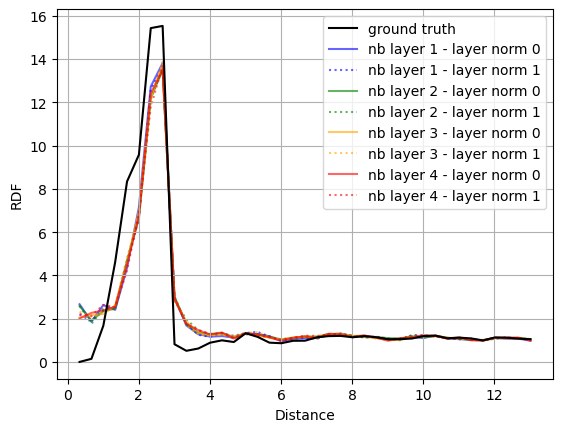

In [24]:
mean_res, std_res, r = RDF_base_normal
lim_rdf = 40

res_rdf = []


mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]

plt.plot(r, mean_res, color = 'k', label = 'ground truth', zorder = 2)
#plt.fill_between(r, mean_res - std_res, mean_res+ std_res, color = 'k', alpha = 0.4, zorder = 1)

for i in range(len(nb_layer_list)):
    #print(MSD_list_normal[i][:limit_scat].shape)
    mean_res, std_res, r = RDF_list_normal[i]
    mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
    
    res_rdf.append(mean_res)
    
    plt.plot(r, mean_res,color = colors[i], linestyle=styles[i], label =labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(r, mean_res -std_res,  mean_res + std_res, color = colors[i], alpha = 0.4, zorder = 2)

plt.xlabel('Distance')
plt.ylabel('RDF')
plt.grid()
plt.legend()


plt.savefig('rdf-gnn.png', bbox_inches='tight')
plt.show()

In [25]:
mean_res, std_res, r = RDF_base_normal
mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
rdf_gt = np.mean(mean_res, axis = 0)

for i in range(len(res_rdf)):
    delta = (rdf_gt - res_rdf[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 7.942724440068651 +- 26.885519724396953
l1: nb layer 1 - layer norm 1 >>>> 7.610963183689146 +- 25.993354557590195
l1: nb layer 2 - layer norm 0 >>>> 7.3551735599316315 +- 24.943740219227735
l1: nb layer 2 - layer norm 1 >>>> 7.373602262540812 +- 24.96745626917411
l1: nb layer 3 - layer norm 0 >>>> 7.557434022626656 +- 25.627879153483843
l1: nb layer 3 - layer norm 1 >>>> 7.634975491831924 +- 26.05302039689404
l1: nb layer 4 - layer norm 0 >>>> 7.4628761834591755 +- 25.364971241482067
l1: nb layer 4 - layer norm 1 >>>> 7.263940160308976 +- 24.781705997538406


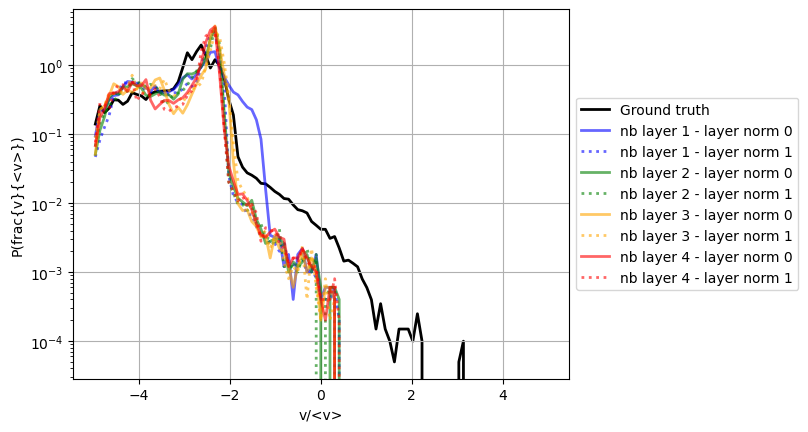

In [26]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)
magn_base_std = np.std(magn_base, axis = 0)

res_magn_distr = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k',lw=2, zorder = 1, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    magn_base_mean = np.mean(magn, axis = 0)
    magn_base_std = np.std(magn, axis = 0)
    
    res_magn_distr.append(magn_base_mean)
    plt.semilogy(b[1:]-db/2,magn_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)



plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-magn-gat.png', bbox_inches='tight')
plt.show()

In [27]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_distr)):
    delta = (magn_gt - res_magn_distr[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.04043086373852162 +- 0.14591636260085758
l1: nb layer 1 - layer norm 1 >>>> 0.10749720129149491 +- 0.4595970771672131
l1: nb layer 2 - layer norm 0 >>>> 0.10741003301322363 +- 0.5455145077504695
l1: nb layer 2 - layer norm 1 >>>> 0.11605700922344624 +- 0.6354860979737913
l1: nb layer 3 - layer norm 0 >>>> 0.16307506274512942 +- 0.7362173258390471
l1: nb layer 3 - layer norm 1 >>>> 0.13059193158996854 +- 0.5097958475818797
l1: nb layer 4 - layer norm 0 >>>> 0.16730715273373706 +- 0.8128906416401652
l1: nb layer 4 - layer norm 1 >>>> 0.1445023819947685 +- 0.6259684738615952


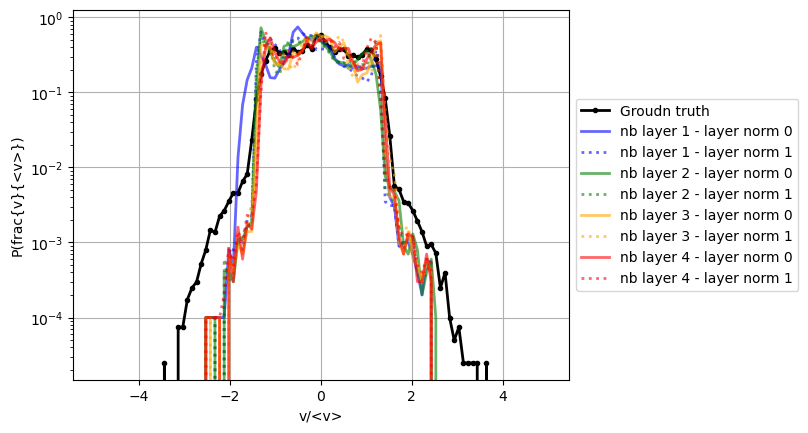

In [28]:
magn_base_mean = np.mean(x_speed, axis = 0)
magn_base_std = np.std(x_speed, axis = 0)

res_magn_x = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Groudn truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    x_base_mean = np.mean(x, axis = 0)
    x_base_std = np.std(x, axis = 0)
    
    res_magn_x.append(x_base_mean)
    
    plt.semilogy(b[1:]-db/2,x_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

    
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('speed-x-gnn.png', bbox_inches='tight')
plt.show()

In [29]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(x_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_x)):
    delta = (magn_gt - res_magn_x[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.007753733647732937 +- 0.022148891978035188
l1: nb layer 1 - layer norm 1 >>>> 0.007878701079949807 +- 0.024408282459117057
l1: nb layer 2 - layer norm 0 >>>> 0.00576079163512563 +- 0.03072866607852264
l1: nb layer 2 - layer norm 1 >>>> 0.005521715883625679 +- 0.017658727732402308
l1: nb layer 3 - layer norm 0 >>>> 0.00437793968555473 +- 0.013614744863534839
l1: nb layer 3 - layer norm 1 >>>> 0.005220234297843017 +- 0.018147439039721106
l1: nb layer 4 - layer norm 0 >>>> 0.0028970054575605027 +- 0.009922177038960974
l1: nb layer 4 - layer norm 1 >>>> 0.003664504063165437 +- 0.01494041808020975


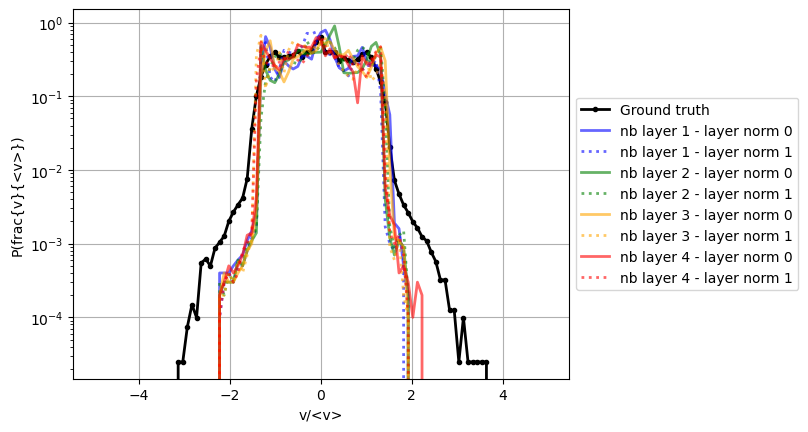

In [30]:
magn_base_mean = np.mean(y_speed, axis = 0)
magn_base_std = np.std(y_speed, axis = 0)

res_magn_y = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    y_base_mean = np.mean(y, axis = 0)
    y_base_std = np.std(y, axis = 0)
    
    res_magn_y.append(y_base_mean)
    
    plt.semilogy(b[1:]-db/2,y_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')




plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-y-gat.png', bbox_inches='tight')
plt.show()

In [31]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(y_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_y)):
    delta = (magn_gt - res_magn_y[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.0054270409315953375 +- 0.021237721162207127
l1: nb layer 1 - layer norm 1 >>>> 0.006177965682867442 +- 0.017957118270721526
l1: nb layer 2 - layer norm 0 >>>> 0.009074366241840649 +- 0.02987937759151385
l1: nb layer 2 - layer norm 1 >>>> 0.0032920058469139376 +- 0.011493794020014759
l1: nb layer 3 - layer norm 0 >>>> 0.005146765458063014 +- 0.013529294184016907
l1: nb layer 3 - layer norm 1 >>>> 0.006419580980201689 +- 0.02561047501183583
l1: nb layer 4 - layer norm 0 >>>> 0.0038966401797156437 +- 0.014908509441784663
l1: nb layer 4 - layer norm 1 >>>> 0.0036153222819408975 +- 0.013816610686346667


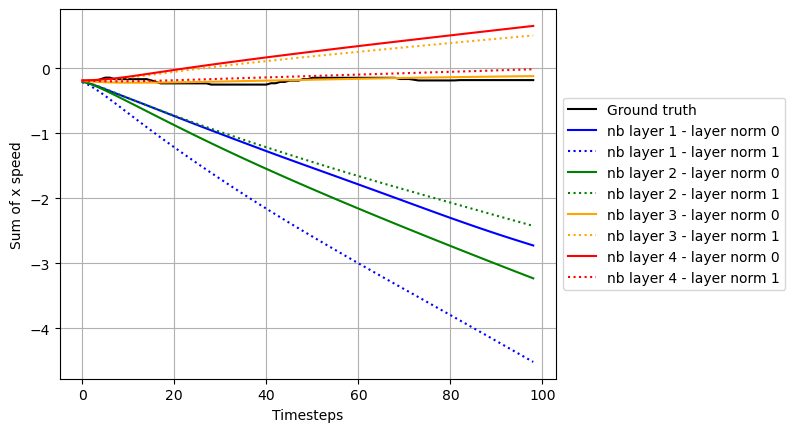

In [32]:
mean_sum = np.mean(SUM_base_normal, axis = 0)
std_sum = np.std(SUM_base_normal, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 0], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_normal[i], axis = 0)
    sum_std = np.std(SUM_list_normal[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 0], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-x-gnn.png', bbox_inches='tight')
plt.show()

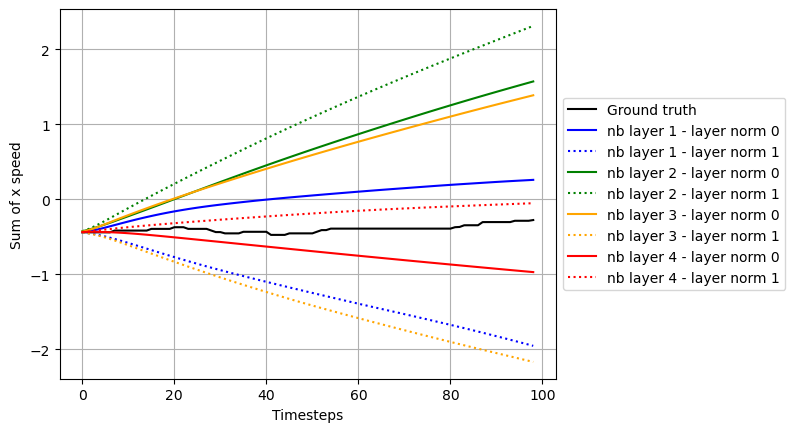

In [33]:
mean_sum = np.mean(SUM_base_normal, axis = 0)
std_sum = np.std(SUM_base_normal, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 1], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_normal[i], axis = 0)
    sum_std = np.std(SUM_list_normal[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 1], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

#plt.ylim([np.min(mean_sum[:liit_sum, 1])- 0.5, np.max(mean_sum[:liit_sum, 1])+ 0.5])

plt.savefig('speed-sum-y-gnn.png', bbox_inches='tight')
plt.show()

# =======================
# =======================

In [34]:
NB_SIM = 5


def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 400


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params


params1 = getParams()

params2 = getParams()
params2.noisy = 1


#data_gt_1  = gen.get_mult_data(params1, NB_SIM)
#graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
#data_gt_list_1 = array2List(data_gt_1)


data_gt_2 = gen.get_mult_data(params2, NB_SIM)
graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
data_gt_list_2 = array2List(data_gt_2)

1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 44.72it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:07<00:00, 51.90it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 47.00it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 47.48it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 48.04it/s]


In [35]:
start = 250
length = 100

stop = start+length

In [36]:

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)



MSD_base_noisy = stats.MSD_stat(data_gt_2[:, start:stop])
RDF_base_noisy  = stats.apply_rdf(data_gt_2[:, start:stop])
SCAT_base_noisy = stats.applySelfScattering(data_gt_2[:, start:stop])
DISTR_base_noisy = stats.apply_hist(data_gt_2, a, b)
SUM_base_noisy = stats.sumSpeeds(data_gt_2[:, start:stop])        # issue wiht libtrayr

100%|██████████| 100/100 [00:01<00:00, 61.62it/s]


In [37]:
# laoders
import dataLoading as dl
from torch_geometric.loader import DataLoader
from torch.utils.data import DataLoader as DataLoaderPy




PATH_BASE = '/home/jpierre/v2/path_datasets'

def getLoader(path, batch_size = 32, shuffleBool = True, root = None, jsonFile = None, mode = 'training'):
    datasetTraining = dl.DataLoader2(root, path = path, jsonFile = jsonFile, mode = mode)
    loader = DataLoader(datasetTraining, batch_size=batch_size, shuffle = shuffleBool)
    
    return loader

# 1s-tep loader
#p_data = '/scratch/users/jpierre/mew_0.001_normal_v2'
p_data = '/scratch/users/jpierre/mew_0.001_noisy_v2'

batchSizeEval = 128
p_json = os.path.join(PATH_BASE, f'{p_data.split("/")[-1]}.json')

loaderEval = getLoader(p_data, batch_size = batchSizeEval, jsonFile = p_json, mode = 'validation')


# rollout laoder

p_sim = os.path.join(p_data, 'validation/np_file')

loaderSim = dl.simLoader2(p_sim)
loaderSim = DataLoaderPy(loaderSim, batch_size=1, shuffle=False)

1it [00:00,  5.04it/s]


In [ ]:
MSD_list_noisy = []
RDF_list_noisy = []
SCAT_list_noisy = []
DISTR_list_noisy = []
SUM_list_noisy = []
MSE_rollout = []

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)


device = DEVICE


errors_list = []
std_errors_list = []
angles_error_list = []
norm_errors_list = []
angle_errors_std_list = []
norm_errors_std_list = []



sim_error_list = []
sim_error_std_list = []






for i in tqdm(range(len(noisy_models_layers))):

    ## load model
    cfg = noisy_models_layers[i].cfg
    std_path = noisy_models_layers[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_2, 
                                        initId = start,
                                        nbStep = length,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy()[:, :length],data_gt_2.copy()[:, start:stop])



    MSD_list_noisy.append(msd)
    RDF_list_noisy.append(rdf)
    SCAT_list_noisy.append(scat)
    DISTR_list_noisy.append(speed_distr)
    SUM_list_noisy.append(sum_speed)
    
    
    
    
    errors = []
    normError = []
    angleError = []
    
    for d, _ in tqdm(loaderEval, leave = False):
        d = d.to(device)
        d.x = d.x[:, 2:]
        d = normalizeGraph(d)
        pred = model(d)  
        
        d.y = torch.swapaxes(d.y, 0, 1)
        

        #evalLoss += torch.nn.functional.l1_loss(pred.reshape(-1), d.y[0, :, :].reshape(-1))
        
        
        errors.extend(torch.abs(pred - d.y[0, :, :]).cpu().detach().numpy().tolist())
        
        
        errorAngle, errorNorm = errorsDiv(pred.cpu().detach().numpy(), d.y[0, :, :].cpu().detach().numpy())
        
        normError.extend(errorNorm.tolist())
        angleError.extend(errorAngle.tolist())


    erros1 = np.mean(errors)
    errors_std = np.std(errors)

    angle_error = np.median(errorAngle)
    norm_error = np.median(normError)

    angle_std = np.std(errorAngle)
    norm_std  = np.std(normError)


    # add to the other lists
    errors_list.append(erros1)
    std_errors_list.append(errors_std)
    angles_error_list.append(angle_std)
    norm_errors_list.append(norm_error)
    angle_errors_std_list.append(angle_std)
    norm_errors_std_list.append(norm_std)
    
    
    
    
    ################
    
    
    eval_loss_list = []

    for d, _ in loaderSim:

        d = torch.squeeze(d, dim = 0).numpy()
        start_id = 8       # not 0
        res = getSimulationData(model, 15, d, i = start_id, device = DEVICE)
        L = res.shape[0]

        eval_loss_list.append(torch.nn.functional.l1_loss(res.reshape(-1), torch.from_numpy(d[start_id:(start_id + L), :, :].copy()).reshape(-1).to(device)).cpu().detach().numpy())

    
    
    sim_error_list.append(np.mean(eval_loss_list))
    sim_error_std_list.append(np.std(eval_loss_list))


  0%|          | 0/8 [00:00<?, ?it/s]

>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 176.94it/s]

100%|██████████| 99/99 [00:00<00:00, 185.85it/s]

100%|██████████| 99/99 [00:00<00:00, 209.67it/s]

100%|██████████| 99/99 [00:00<00:00, 198.46it/s]

100%|██████████| 99/99 [00:00<00:00, 219.89it/s]

100%|██████████| 100/100 [00:01<00:00, 72.99it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.41it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.45it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.88it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.04it/s][A

 43%|████▎     | 66/155 [01:24<01:39,  1.12s/it]


100%|██████████| 155/155 [02:20<00:00,  1.92it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 253.23it/s]

100%|██████████| 15/15 [00:00<00:00, 236.11it/s]

100%|██████████| 15/15 [00:00<00:00, 248.16it/s]

100%|██████████| 15/15 [00:00<00:00, 199.82it/s]

100%|██████████| 15/15 [00:00<00:00, 222.72it/s]

100%|██████████| 15/15 [00:00<00:00, 245.38it/s]

100%|██████████| 15/15 [00:00<00:00, 245.20it/s]

100%|██████████| 15/15 [00:00<00:00, 248.15it/s]

100%|██████████| 15/15 [00:00<00:00, 261.09it/s]

100%|██████████| 15/15 [00:00<00:00, 261.83it/s]

100%|██████████| 15/15 [00:00<00:00, 252.38it/s]

100%|██████████| 15/15 [00:00<00:00, 247.88it/s]

100%|██████████| 15/15 [00:00<00:00, 250.12it/s]

100%|██████████| 15/15 [00:00<00:00, 252.99it/s]

100%|██████████| 15/15 [00:00<00:00, 261.86it/s]

100%|██████████| 15/15 [00:00<00:00, 244.15it/s]

100%|██████████| 15/15 [00:00<00:00, 252.68it/s]

100%|██████████| 15/15 [00:00<00:00, 246.33it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 234.56it/s]

100%|██████████| 99/99 [00:00<00:00, 211.62it/s]

100%|██████████| 99/99 [00:00<00:00, 198.26it/s]

100%|██████████| 99/99 [00:00<00:00, 210.51it/s]

100%|██████████| 99/99 [00:00<00:00, 213.37it/s]

100%|██████████| 100/100 [00:01<00:00, 93.08it/s][A

100%|██████████| 100/100 [00:01<00:00, 92.54it/s]

100%|██████████| 100/100 [00:01<00:00, 88.40it/s][A

100%|██████████| 100/100 [00:01<00:00, 96.23it/s]

100%|██████████| 100/100 [00:01<00:00, 94.59it/s][A

 51%|█████     | 79/155 [01:16<00:43,  1.76it/s]


100%|██████████| 155/155 [02:01<00:00,  1.96it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 213.18it/s]

100%|██████████| 15/15 [00:00<00:00, 220.37it/s]

100%|██████████| 15/15 [00:00<00:00, 250.88it/s]

100%|██████████| 15/15 [00:00<00:00, 243.45it/s]

100%|██████████| 15/15 [00:00<00:00, 254.12it/s]

100%|██████████| 15/15 [00:00<00:00, 234.20it/s]

100%|██████████| 15/15 [00:00<00:00, 244.68it/s]

100%|██████████| 15/15 [00:00<00:00, 254.37it/s]

100%|██████████| 15/15 [00:00<00:00, 254.81it/s]

100%|██████████| 15/15 [00:00<00:00, 256.60it/s]

100%|██████████| 15/15 [00:00<00:00, 252.26it/s]

100%|██████████| 15/15 [00:00<00:00, 229.50it/s]

100%|██████████| 15/15 [00:00<00:00, 223.98it/s]

100%|██████████| 15/15 [00:00<00:00, 186.91it/s]

100%|██████████| 15/15 [00:00<00:00, 197.87it/s]

100%|██████████| 15/15 [00:00<00:00, 249.71it/s]

100%|██████████| 15/15 [00:00<00:00, 230.38it/s]

100%|██████████| 15/15 [00:00<00:00, 253.74it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 162.44it/s]

100%|██████████| 99/99 [00:00<00:00, 171.76it/s]

100%|██████████| 99/99 [00:00<00:00, 169.44it/s]

100%|██████████| 99/99 [00:00<00:00, 170.51it/s]

100%|██████████| 99/99 [00:00<00:00, 157.50it/s]

100%|██████████| 100/100 [00:01<00:00, 81.30it/s][A

100%|██████████| 100/100 [00:01<00:00, 83.78it/s][A

100%|██████████| 100/100 [00:01<00:00, 77.46it/s][A

100%|██████████| 100/100 [00:01<00:00, 74.36it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.81it/s][A

 43%|████▎     | 66/155 [00:55<00:51,  1.73it/s]


100%|██████████| 155/155 [01:44<00:00,  2.20it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 215.62it/s]

100%|██████████| 15/15 [00:00<00:00, 212.70it/s]

100%|██████████| 15/15 [00:00<00:00, 200.37it/s]

100%|██████████| 15/15 [00:00<00:00, 226.79it/s]

100%|██████████| 15/15 [00:00<00:00, 231.64it/s]

100%|██████████| 15/15 [00:00<00:00, 230.82it/s]

100%|██████████| 15/15 [00:00<00:00, 231.82it/s]

100%|██████████| 15/15 [00:00<00:00, 223.40it/s]

100%|██████████| 15/15 [00:00<00:00, 179.87it/s]

100%|██████████| 15/15 [00:00<00:00, 176.20it/s]

100%|██████████| 15/15 [00:00<00:00, 220.56it/s]

100%|██████████| 15/15 [00:00<00:00, 220.94it/s]

100%|██████████| 15/15 [00:00<00:00, 181.43it/s]

100%|██████████| 15/15 [00:00<00:00, 229.91it/s]

100%|██████████| 15/15 [00:00<00:00, 213.69it/s]

100%|██████████| 15/15 [00:00<00:00, 231.52it/s]

100%|██████████| 15/15 [00:00<00:00, 220.95it/s]

100%|██████████| 15/15 [00:00<00:00, 236.27it/s]



>>>>>>>>>>> Loading Compex model



100%|██████████| 99/99 [00:00<00:00, 219.23it/s]

100%|██████████| 99/99 [00:00<00:00, 206.06it/s]

100%|██████████| 99/99 [00:00<00:00, 207.32it/s]

100%|██████████| 99/99 [00:00<00:00, 206.92it/s]

100%|██████████| 99/99 [00:00<00:00, 198.76it/s]

100%|██████████| 100/100 [00:01<00:00, 82.11it/s]

100%|██████████| 100/100 [00:01<00:00, 86.13it/s][A

100%|██████████| 100/100 [00:01<00:00, 85.74it/s][A

100%|██████████| 100/100 [00:01<00:00, 83.86it/s][A

100%|██████████| 100/100 [00:01<00:00, 83.19it/s][A

 49%|████▉     | 76/155 [00:47<00:47,  1.67it/s]


100%|██████████| 155/155 [01:33<00:00,  2.22it/s]
                                                 

In [ ]:
print(f'errors ==>  {errors_list}')
print(f'errors std ==> {std_errors_list}')
print(f'angle_error ==>  {angles_error_list}')
print(f'angle_std std ==> {angle_errors_std_list}')
print(f'norm_errors_list ==>  {norm_errors_list}')
print(f'norm_errors_std_list std ==> {norm_errors_std_list}')

print(f'sim_error_list ==>  {sim_error_list}')
print(f'sim_error_std_list std ==> {sim_error_std_list}')

In [ ]:
nb_layer_list = [noisy_models_layers[i].nbLayer for i in range(len(noisy_models_layers))]
# layer norm
print(nb_layer_list)

In [ ]:
labels_graphs = [f'nb layer {normal_models_layers[i].nbLayer} - layer norm {noisy_models_layers[i].layerNorm}' for i in range(len(noisy_models_layers))]
print(labels_graphs)

In [ ]:
colors = ['blue','blue', 'green', 'green', 'orange','orange', 'red', 'red']
styles = ['solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted']

In [ ]:
limit_scat = 99
limit_msd = 99


In [ ]:
# plot of MSD

res_msd = []


for i in range(len(nb_layer_list)):
    print(MSD_list_noisy[i][:limit_msd].shape)
    msd_mean = np.mean(MSD_list_noisy[i][:, :limit_msd], axis = 0)
    msd_std = np.std(MSD_list_noisy[i][:, :limit_msd], axis = 0)
    x = np.arange(limit_msd)
    plt.loglog(x, msd_mean, color = colors[i], linestyle=styles[i], zorder = 1, label = labels_graphs[i])
    plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = colors[i], alpha = 0.4, zorder = 2)
    
    res_msd.append(msd_mean)
    
msd_mean = np.mean(MSD_base_noisy[:, :limit_msd], axis = 0)
msd_std = np.std(MSD_base_noisy[:, :limit_msd], axis = 0)
x = np.arange(limit_msd)
plt.loglog(x, msd_mean, color = 'k', zorder = 1, label = 'Ground Truth')
plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = 'k', alpha = 0.2, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('MSD-gnn-noisy.png', bbox_inches='tight')
plt.show()


In [ ]:
msd_gt = np.mean(MSD_base_noisy[:, :limit_msd], axis = 0)

for i in range(len(res_msd)):
    delta = (msd_gt - res_msd[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
# plot of scat

res_scat = []


ssf_mean = np.mean(SCAT_base_noisy[:, :limit_scat], axis = 0)
ssf_std = np.std(SCAT_base_noisy[:, :limit_scat], axis = 0)
t = np.arange(limit_scat)
plt.semilogy(t, ssf_mean, color = 'k', lw=2, label = 'Ground truth', zorder = 2)
#plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = 'k', alpha = 0.2, zorder = 3)


for i in range(len(nb_layer_list)):
    #print(MSD_list_noisy[i][:limit_scat].shape)
    ssf_mean = np.mean(SCAT_list_noisy[i][:, :limit_scat], axis = 0)
    ssf_std = np.std(SCAT_list_noisy[i][:, :limit_scat], axis = 0)
    t = np.arange(limit_scat)
    plt.semilogy(t, ssf_mean, color = colors[i], linestyle=styles[i], lw=2, label = labels_graphs[i], alpha = 0.6, zorder = 1)
    res_scat.append(ssf_mean)

    #plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('Self-intermediate scattering functoin')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('scat-gnn-noisy.png', bbox_inches='tight')
plt.show()


In [ ]:
scat_gt = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)

for i in range(len(res_scat)):
    delta = (scat_gt - res_scat[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
mean_res, std_res, r = RDF_base_noisy
lim_rdf = 40

res_rdf = []

mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]

plt.plot(r, mean_res, color = 'k', label = 'ground truth', zorder = 2)
#plt.fill_between(r, mean_res - std_res, mean_res+ std_res, color = 'k', alpha = 0.4, zorder = 1)

for i in range(len(nb_layer_list)):
    #print(MSD_list_noisy[i][:limit_scat].shape)
    mean_res, std_res, r = RDF_list_noisy[i]
    mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
    res_rdf.append(mean_res)

    
    plt.plot(r, mean_res,color = colors[i], linestyle=styles[i], label =labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(r, mean_res -std_res,  mean_res + std_res, color = colors[i], alpha = 0.4, zorder = 2)

plt.xlabel('Distance')
plt.ylabel('RDF')
plt.grid()
plt.legend()


plt.savefig('rdf-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
mean_res, std_res, r = RDF_base_normal
mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
rdf_gt = np.mean(mean_res, axis = 0)

for i in range(len(res_rdf)):
    delta = (rdf_gt - res_rdf[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_noisy

magn_base_mean = np.mean(magn_base, axis = 0)
magn_base_std = np.std(magn_base, axis = 0)


res_magn_distr = []



fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k',lw=2, zorder = 1, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    magn_base_mean = np.mean(magn, axis = 0)
    magn_base_std = np.std(magn, axis = 0)
    
    res_magn_distr.append(magn_base_mean)

    plt.semilogy(b[1:]-db/2,magn_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)



plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{|rel|})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-magn-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_distr)):
    delta = (magn_gt - res_magn_distr[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base_mean = np.mean(x_speed, axis = 0)
magn_base_std = np.std(x_speed, axis = 0)

res_magn_x = []



fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Groudn truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    x_base_mean = np.mean(x, axis = 0)
    x_base_std = np.std(x, axis = 0)
    
    res_magn_x.append(x_base_mean)
    plt.semilogy(b[1:]-db/2,x_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

    
plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel}(x))$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('speed-x-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(x_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_x)):
    delta = (magn_gt - res_magn_x[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base_mean = np.mean(y_speed, axis = 0)
magn_base_std = np.std(y_speed, axis = 0)

res_magn_y = []



fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    y_base_mean = np.mean(y, axis = 0)
    y_base_std = np.std(y, axis = 0)
    res_magn_y.append(y_base_mean)

    plt.semilogy(b[1:]-db/2,y_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')




plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel}(y))$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-y-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(y_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_y)):
    delta = (magn_gt - res_magn_y[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
mean_sum = np.mean(SUM_base_noisy, axis = 0)
std_sum = np.std(SUM_base_noisy, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 0], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_noisy[i], axis = 0)
    sum_std = np.std(SUM_list_noisy[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 0], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-x-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
mean_sum = np.mean(SUM_base_noisy, axis = 0)
std_sum = np.std(SUM_base_noisy, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 1], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_noisy[i], axis = 0)
    sum_std = np.std(SUM_list_noisy[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 1], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-y-gnn-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.plot(data_pred[0][:, :, 0], data_pred[0][:, :, 1])

In [ ]:
data_gt_2.copy()[:, start:stop]

In [ ]:
plt.plot(data_gt_1[0][:, :, 0], data_gt_1[0][:, :, 1])